In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import torch
import torch.nn as nn
import visdom

In [3]:
from preprocessing_utils import process_sat_data, pickle_save, pickle_load
from ellipse_3d import transform3d, fit_ellipse

In [4]:
data_train = pd.read_csv('../data/train.csv')
data_test = pd.read_csv('../data/track1/test.csv')

In [5]:
train_data = data_train.copy(deep=True)
test_data = data_test.copy(deep=True)

In [6]:
process_sat_data(train_data, test_data, scale=10000)

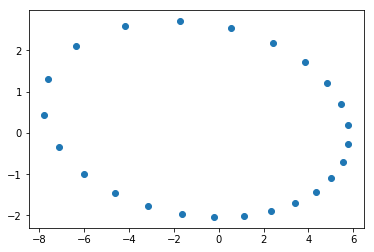

In [7]:
transformed_data = transform3d(train_data, 69, 5)
plt.scatter(transformed_data[:,0], transformed_data[:,1])

In [8]:
model = fit_ellipse(transformed_data)

Final Loss:  5.1185814697873866e-08


Major: 6.832812734476337 | Minor: 2.3499693800458674 | Center: (-1.007256269454956,0.33769306540489197) | Rotation: 176.29981832799362


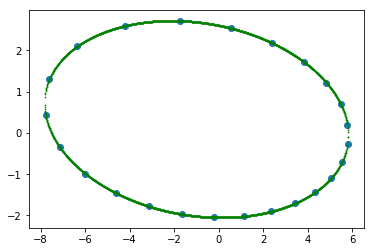

In [9]:
model.plot(transformed_data)